# Industry Driven Elective

## Artificial Intelligence and Machine Learning (IS6E106) offered by Nokia

### Project: Stock Price Prediction

The challenge of this project is to accurately predict the future closing value of a given stock across a given period of time in the future.

# Introduction


<br></br>
We explore a Machine Learning algorithm called Recurrent Neural Network (RNN), it's a common Deep Learning technique used for continuous data pattern recognition. Recurrent Neural Network take into account how data changes over time, it's typically used for time-series data (stock prices, sensor readings, etc). Recurrent Neural Network can also be used for video analysis.


<br></br>
Suppose you are provided with a dataset consisting of stock prices for Google Inc, used to train a model and predict future stock prices as shown below.


<br></br>
<div align="center"><img src="https://raw.githubusercontent.com/AMoazeni/Machine-Learning-Stock-Market-Prediction/master/Jupyter%20Notebook/Images/01%20-%20Google%20Stock%20Price%20Prediction.png" alt="Google-Stock"></div>


<br></br>
For improved predictions, you can train this model on stock price data for more companies in the same sector, region, subsidiaries, etc. Sentiment analysis of the web, news, and social media may also be useful in your predictions. The open-source developer Sentdex has created a really useful tool for [S&P 500 Sentiment Analysis](http://sentdex.com/financial-analysis/).


<br></br>
<br></br>

# Recurrent Neural Networks

<br></br>
As we try to model Machine Learning to behave like brains, weights represent long-term memory in the Temporal Lobe. Recognition of patterns and images is done by the Occipital Lobe which works similar to Convolution Neural Networks. Recurrent Neural Networks are like short-term memory which remembers recent memory and can create context similar to the Frontal Lobe. The Parietal Lobe is responsible for spacial recognition like Botlzman Machines. Recurrent Neural Networks connect neurons to themselves through time, creating a feedback loop that preserves short-term and long-term memory awareness.

<br></br>
<div align="center"><img src="https://raw.githubusercontent.com/AMoazeni/Machine-Learning-Stock-Market-Prediction/master/Jupyter%20Notebook/Images/02%20-%20Brain%20Diagram.png" width="400" alt="Brain"></div>


<br></br>
The following diagram represents the old-school way to describe RNNs, which shows a Feedback Loop (temporal loop) structure that connects hidden layers to themselves and the output layer which gives them a short-term memory.


### Compact Form Representation

<br></br>
<div align="center"><img src="https://raw.githubusercontent.com/AMoazeni/Machine-Learning-Stock-Market-Prediction/master/Jupyter%20Notebook/Images/03%20-%20Old%20RNN%20Representation.png" alt="RNN"></div>



### Expanded Form Representation

<br></br>
<div align="center"><img src="https://raw.githubusercontent.com/AMoazeni/Machine-Learning-Stock-Market-Prediction/master/Jupyter%20Notebook/Images/04%20-%20Expanded%20%20RNN%20Representation.png" width="400" alt="RNN-2"></div>


<br></br>
A more modern representation shows the following RNN types and use examples: 

1. One-To-Many: Computer description of an image. CNN used to classify images and then RNN used to make sense of images and generate context.

2. Many-To-One: Sentiment Analysis of text (gague the positivity or negativity of text)

3. Many-to-Many: Google translate of language who's vocabulary changes based on the gender of the subject. Also subtitling of a movie.


<br></br>
<div align="center"><img src="https://raw.githubusercontent.com/AMoazeni/Machine-Learning-Stock-Market-Prediction/master/Jupyter%20Notebook/Images/05%20-%20RNN%20Examples.png" width="600" alt="RNN-Example"></div>


<br></br>
Check out Andrej Karpathy's Blog (Director of AI at Tesla) on [Github](http://karpathy.github.io/) and [Medium](https://medium.com/@karpathy/).


<br></br>
Here is the movie script writen by an AI trained with an LSTM Recurrent Neural Network: [Sunspring by Benjamin the Artificial Intelligence](https://www.youtube.com/watch?v=LY7x2Ihqjmc).



<br></br>
<br></br>

# RNN Gradient Problem (Expanding or Vanishing)

<br></br>
The gradient is used to update the weights in an RNN by looking back a certain number of user defined steps. The lower the gradient, the harder it is to update the weights (vanishing gradient) of nodes further back in time. Especially because previous layers are used as inputs for future layers. This means old neurons are training much slower that more current neurons. It's like a domino effect.

<br></br>
<div align="center"><img src="https://raw.githubusercontent.com/AMoazeni/Machine-Learning-Stock-Market-Prediction/master/Jupyter%20Notebook/Images/06%20-%20RNN%20Vanish%20Gradient.png" alt="RNN-Vanishing"></div>



<br></br>
<br></br>

# Expanding Gradient Solutions


### 1. Truncated Back-propagation
Stop back-propagation after a certain point (not an optimal because not updating all the weights). Better than doing nothing which can produce an irrelevant network.


### 2. Penalties
The gradient can be penalized and artificially reduced.


### 3. Gradient Clipping
A maximum limit for the gradient which stops it from rising more.



<br></br>
<br></br>

# Vanishing Gradient Solutions

### 1. Weight Initialization
You can be smart about how you initialize weights to minimize the vanishing gradient problem.


### 2. Echo State Network
Designed to solve vanishing gradient problem. It's a recurrent neural network with a sparsely connected hidden layer (with typically 1% connectivity). The connectivity and weights of hidden neurons are fixed and randomly assigned.


### 3. Long Short-Term Memory Networks (LSTM)
Most popular RNN structure to tackle this problem.



<br></br>
<br></br>

# LSTM

<br></br>
When the weight of an RNN gradient 'W_rec' is less than 1 we get Vanishing Gradient, when 'W_rec' is more than 1 we get Expanding Gradient, thus we can set 'W_rec = 1'.


<br></br>
<div align="center"><img src="https://raw.githubusercontent.com/AMoazeni/Machine-Learning-Stock-Market-Prediction/master/Jupyter%20Notebook/Images/07%20-%20LSTM.png" alt="LSTM"></div>


<br></br>
- Circles represent Layers (Vectors).

- 'C' represents Memory Cells Layers.

- 'h' represents Output Layers (Hidden States).

- 'X' represents Input Layers.

- Lines represent values being transferred.

- Concatenated lines represent pipelines running in parallel.

- Forks are when Data is copied.

- Pointwise Element-by-Element Operation (X) represents valves (from left-to-right: Forget Valve, Memory Valve, Output Valve).

- Valves can be open, closed or partially open as decided by an Activation Function.

- Pointwise Element-by-Element Operation (+) represent a Tee pipe joint, allowing stuff through if the corresponding valve is activated.

- Pointwise Element-by-Element Operation (Tanh) Tangent function that outputs (values between -1 to 1).

- Sigma Layer Operation Sigmoid Activation Function (values from 0 to 1).


<br></br>
<div align="center"><img src="https://raw.githubusercontent.com/AMoazeni/Machine-Learning-Stock-Market-Prediction/master/Jupyter%20Notebook/Images/08%20-%20LSTM%20Cell.png" alt="LSTM-Cell"></div>



<br></br>
<br></br>

# LSTM Step 1

New Value 'X_t' and value from previous node 'h_t-1' decide if the forget valve should be opened or closed (Sigmoid).

<div align="center"><img src="https://raw.githubusercontent.com/AMoazeni/Machine-Learning-Stock-Market-Prediction/master/Jupyter%20Notebook/Images/09%20-%20LSTM%20Step%201.png" width="600" alt="LSTM-Step-1"></div>



<br></br>
<br></br>

# LSTM Step 2

New Value 'X_t' and value from Previous Node 'h_t-1'. Together they decide if the memory valve should be opened or closed (Sigmoid). To what extent to let values through (Tanh from -1 to 1).

<div align="center"><img src="https://raw.githubusercontent.com/AMoazeni/Machine-Learning-Stock-Market-Prediction/master/Jupyter%20Notebook/Images/10%20-%20LSTM%20Step%202.png" width="600" alt="LSTM-Step-2"></div>



<br></br>
<br></br>

# LSTM Step 3

Decide the extent to which a memory cell 'C_t' should be updated from the previous memory cell 'C_t-1'. Forget and memory valves used to decide this. You can update memory completely, not at all or only partially.

<div align="center"><img src="https://raw.githubusercontent.com/AMoazeni/Machine-Learning-Stock-Market-Prediction/master/Jupyter%20Notebook/Images/11%20-%20LSTM%20Step%203.png" width="600" alt="LSTM-Step-3"></div>



<br></br>
<br></br>

# LSTM Step 4

New value 'X_t' and value from previous node 'h_t-1' decides which part of the memory pipeline, and to what extent they will be used as an Output 'h_t'.

<div align="center"><img src="https://raw.githubusercontent.com/AMoazeni/Machine-Learning-Stock-Market-Prediction/master/Jupyter%20Notebook/Images/12%20-%20LSTM%20Step%204.png" width="600" alt="LSTM-Step-4"></div>



<br></br>
<br></br>

# LSTM Variation 1 (Add Peep holes)

Sigmoid layer activation functions now have additional information about the current state of the Memory Cell. So valve decisions are made, taking into account memory cell state.

<div align="center"><img src="https://raw.githubusercontent.com/AMoazeni/Machine-Learning-Stock-Market-Prediction/master/Jupyter%20Notebook/Images/13%20-%20LSTM%20Var%201.png" width="600" alt="LSTM-Var-1"></div>



<br></br>
<br></br>

# LSTM Variation 2 (Connect Forget & Memory Valves)

Forget and memory valves can make a combined decision. They're connected with a '-1' multiplier so one opens when the other closes.

<div align="center"><img src="https://raw.githubusercontent.com/AMoazeni/Machine-Learning-Stock-Market-Prediction/master/Jupyter%20Notebook/Images/14%20-%20LSTM%20Var%202.png" width="600" alt="LSTM-Var-2"></div>



<br></br>
<br></br>

# LSTM Variation 3 (GRU: Gated Recurring Units)

The memory pipeline is replaced by the hidden pipeline. Simpler but less flexible in terms of how many things are being monitored and controlled.

<div align="center"><img src="https://raw.githubusercontent.com/AMoazeni/Machine-Learning-Stock-Market-Prediction/master/Jupyter%20Notebook/Images/15%20-%20LSTM%20Var%203.png" width="600" alt="LSTM-Var-3"></div>




<br></br>
<br></br>
<br></br>
<br></br>


In [1]:
# prerequisite installation
#!pip3 install yfinance
#!pip3 install matplotlib
#!pip3 install numpy
#!pip3 install pandas
#!pip3 install visualize

## Retrieving the data

[*********************100%***********************]  1 of 1 completed


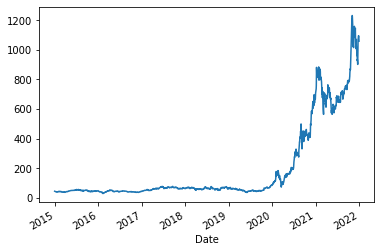

In [2]:
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
data = yf.download('TSLA','2015-01-01','2022-01-01')
data["Adj Close"].plot()
plt.show()

In [3]:
data.to_csv('tesla.csv',index = False)

## Normalising the data

In [4]:
import pandas as pd
import numpy as np

data = pd.read_csv('tesla.csv')
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))

        Open       High        Low      Close  Adj Close    Volume
0  44.618000  45.136002  44.450001  44.481998  44.481998  11487500
1  44.574001  44.650002  42.652000  43.862000  43.862000  23822000
2  42.910000  43.299999  41.431999  42.018002  42.018002  26842500
3  42.012001  42.840000  40.841999  42.256001  42.256001  31309500
4  42.669998  42.956001  41.956001  42.189999  42.189999  14842000


Open   --- mean : 191.2357847771677   	 Std:  268.57589583959066   	 Max:  1234.4100341796875   	 Min:  28.464000701904297
High   --- mean : 195.3130371651682   	 Std:  274.4522511077426   	 Max:  1243.489990234375   	 Min:  30.99399948120117
Low    --- mean : 186.9265443083921   	 Std:  262.2841396234461   	 Max:  1217.0   	 Min:  28.209999084472656
Close  --- mean : 191.40155297558323   	 Std:  268.83513567701107   	 Max:  1229.9100341796875   	 Min:  28.733999252319336
Volume --- mean : 38275839.51247165   	 Std:  28152650.760726396   	 Max:  304694000   	 Min:  3540000


In [5]:
data1=data

In [6]:
data.pop('High')
#Print the dataframe head and tail
print(data.head())
print("---")
print(data.tail())

        Open        Low      Close  Adj Close    Volume
0  44.618000  44.450001  44.481998  44.481998  11487500
1  44.574001  42.652000  43.862000  43.862000  23822000
2  42.910000  41.431999  42.018002  42.018002  26842500
3  42.012001  40.841999  42.256001  42.256001  31309500
4  42.669998  41.956001  42.189999  42.189999  14842000
---
             Open          Low        Close    Adj Close    Volume
1759  1073.670044  1070.719971  1093.939941  1093.939941  23715300
1760  1109.489990  1078.420044  1088.469971  1088.469971  20108000
1761  1098.640015  1064.140015  1086.189941  1086.189941  18718000
1762  1061.329956  1053.150024  1070.339966  1070.339966  15680300
1763  1073.439941  1054.589966  1056.780029  1056.780029  13577900


In [7]:
data.pop('Low')
#Print the dataframe head and tail
print(data.head())
print("---")
print(data.tail())

        Open      Close  Adj Close    Volume
0  44.618000  44.481998  44.481998  11487500
1  44.574001  43.862000  43.862000  23822000
2  42.910000  42.018002  42.018002  26842500
3  42.012001  42.256001  42.256001  31309500
4  42.669998  42.189999  42.189999  14842000
---
             Open        Close    Adj Close    Volume
1759  1073.670044  1093.939941  1093.939941  23715300
1760  1109.489990  1088.469971  1088.469971  20108000
1761  1098.640015  1086.189941  1086.189941  18718000
1762  1061.329956  1070.339966  1070.339966  15680300
1763  1073.439941  1056.780029  1056.780029  13577900


In [8]:
data.pop('Adj Close')
#Print the dataframe head and tail
print(data.head())
print("---")
print(data.tail())

        Open      Close    Volume
0  44.618000  44.481998  11487500
1  44.574001  43.862000  23822000
2  42.910000  42.018002  26842500
3  42.012001  42.256001  31309500
4  42.669998  42.189999  14842000
---
             Open        Close    Volume
1759  1073.670044  1093.939941  23715300
1760  1109.489990  1088.469971  20108000
1761  1098.640015  1086.189941  18718000
1762  1061.329956  1070.339966  15680300
1763  1073.439941  1056.780029  13577900


<AxesSubplot:>

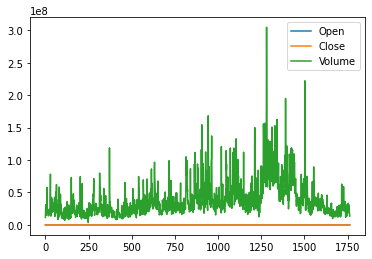

In [9]:
import matplotlib.pyplot as plt
data.plot()

# Normalize the data retrieved

In [10]:
from sklearn import preprocessing
preprocessing.normalize(data)
print(data.head())
print("\n")
print("Open   --- mean :", np.mean(data['Open']),  " \t Std: ", np.std(data['Open']),  "  Max: ", np.max(data['Open']),  " \t Min: ", np.min(data['Open']))
print("Close  --- mean :", np.mean(data['Close']), " \t Std: ", np.std(data['Close']), "  Max: ", np.max(data['Close']), " \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume'])," \t Std: ", np.std(data['Volume']),"  Max: ", np.max(data['Volume'])," \t Min: ", np.min(data['Volume']))

        Open      Close    Volume
0  44.618000  44.481998  11487500
1  44.574001  43.862000  23822000
2  42.910000  42.018002  26842500
3  42.012001  42.256001  31309500
4  42.669998  42.189999  14842000


Open   --- mean : 191.2357847771677  	 Std:  268.57589583959066   Max:  1234.4100341796875  	 Min:  28.464000701904297
Close  --- mean : 191.40155297558323  	 Std:  268.83513567701107   Max:  1229.9100341796875  	 Min:  28.733999252319336
Volume --- mean : 38275839.51247165  	 Std:  28152650.760726396   Max:  304694000  	 Min:  3540000


In [11]:
#Log the normalised data for future resuablilty
data.to_csv('tesla_preprocessed.csv',index= False)

# #Checkpoint 2:Benchmark Model

In [12]:

import math
import pandas as pd
import numpy as np
import sklearn
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
import visualize as vs


data = pd.read_csv('tesla_preprocessed.csv')
display(data.head())

,Open,Close,Volume
0,44.618000,44.481998,11487500
1,44.574001,43.862000,23822000
2,42.910000,42.018002,26842500
3,42.012001,42.256001,31309500
4,42.669998,42.189999,14842000


In [13]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data,data, test_size=0.33)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (1181, 3)
y_train (1181, 3)
x_test (583, 3)
y_test (583, 3)


In [14]:
import numpy as np
#building regression model
from sklearn.model_selection import train_test_split
#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

X=np.array(data.index).reshape(-1,1)
Y=data['Close']


X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.3,random_state=101)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)



#feature scaling
scaler=StandardScaler().fit(X_train)


from sklearn.linear_model import LinearRegression
#creating linear model
lm=LinearRegression()
lm.fit(X_train,y_train)



x_train (1234, 1)
y_train (1234,)
x_test (530, 1)
y_test (530,)


LinearRegression()

In [16]:
#plot actual and predicted values for train dataset
from plotly.graph_objects import layout
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.offline import init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

trace0= go.Scatter(
      x=X_train.T[0],
      y=y_train,
      mode='markers',
      name='Actual'
)

trace1=go.Scatter(
    x=X_train.T[0],
    y=lm.predict(X_train).T,
    mode='lines',name='Predicted'

)

tesla_data=[trace0,trace1]
layout.xaxis.title.text='Day'
plot2=go.Figure(data=tesla_data,layout=layout)

iplot(plot2)

ValueError: 
    Invalid value of type 'builtins.module' received for the 'layout' property of 
        Received value: <module 'plotly.graph_objs.layout' from 'c:\\users\\lavaa\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\plotly\\graph_objs\\layout\\__init__.py'>

    The 'layout' property is an instance of Layout
    that may be specified as:
      - An instance of :class:`plotly.graph_objs.Layout`
      - A dict of string/value properties that will be passed
        to the Layout constructor

        Supported dict properties:
            
            activeshape
                :class:`plotly.graph_objects.layout.Activeshape
                ` instance or dict with compatible properties
            annotations
                A tuple of
                :class:`plotly.graph_objects.layout.Annotation`
                instances or dicts with compatible properties
            annotationdefaults
                When used in a template (as
                layout.template.layout.annotationdefaults),
                sets the default property values to use for
                elements of layout.annotations
            autosize
                Determines whether or not a layout width or
                height that has been left undefined by the user
                is initialized on each relayout. Note that,
                regardless of this attribute, an undefined
                layout width or height is always initialized on
                the first call to plot.
            autotypenumbers
                Using "strict" a numeric string in trace data
                is not converted to a number. Using *convert
                types* a numeric string in trace data may be
                treated as a number during automatic axis
                `type` detection. This is the default value;
                however it could be overridden for individual
                axes.
            bargap
                Sets the gap (in plot fraction) between bars of
                adjacent location coordinates.
            bargroupgap
                Sets the gap (in plot fraction) between bars of
                the same location coordinate.
            barmode
                Determines how bars at the same location
                coordinate are displayed on the graph. With
                "stack", the bars are stacked on top of one
                another With "relative", the bars are stacked
                on top of one another, with negative values
                below the axis, positive values above With
                "group", the bars are plotted next to one
                another centered around the shared location.
                With "overlay", the bars are plotted over one
                another, you might need to an "opacity" to see
                multiple bars.
            barnorm
                Sets the normalization for bar traces on the
                graph. With "fraction", the value of each bar
                is divided by the sum of all values at that
                location coordinate. "percent" is the same but
                multiplied by 100 to show percentages.
            boxgap
                Sets the gap (in plot fraction) between boxes
                of adjacent location coordinates. Has no effect
                on traces that have "width" set.
            boxgroupgap
                Sets the gap (in plot fraction) between boxes
                of the same location coordinate. Has no effect
                on traces that have "width" set.
            boxmode
                Determines how boxes at the same location
                coordinate are displayed on the graph. If
                "group", the boxes are plotted next to one
                another centered around the shared location. If
                "overlay", the boxes are plotted over one
                another, you might need to set "opacity" to see
                them multiple boxes. Has no effect on traces
                that have "width" set.
            calendar
                Sets the default calendar system to use for
                interpreting and displaying dates throughout
                the plot.
            clickmode
                Determines the mode of single click
                interactions. "event" is the default value and
                emits the `plotly_click` event. In addition
                this mode emits the `plotly_selected` event in
                drag modes "lasso" and "select", but with no
                event data attached (kept for compatibility
                reasons). The "select" flag enables selecting
                single data points via click. This mode also
                supports persistent selections, meaning that
                pressing Shift while clicking, adds to /
                subtracts from an existing selection. "select"
                with `hovermode`: "x" can be confusing,
                consider explicitly setting `hovermode`:
                "closest" when using this feature. Selection
                events are sent accordingly as long as "event"
                flag is set as well. When the "event" flag is
                missing, `plotly_click` and `plotly_selected`
                events are not fired.
            coloraxis
                :class:`plotly.graph_objects.layout.Coloraxis`
                instance or dict with compatible properties
            colorscale
                :class:`plotly.graph_objects.layout.Colorscale`
                instance or dict with compatible properties
            colorway
                Sets the default trace colors.
            computed
                Placeholder for exporting automargin-impacting
                values namely `margin.t`, `margin.b`,
                `margin.l` and `margin.r` in "full-json" mode.
            datarevision
                If provided, a changed value tells
                `Plotly.react` that one or more data arrays has
                changed. This way you can modify arrays in-
                place rather than making a complete new copy
                for an incremental change. If NOT provided,
                `Plotly.react` assumes that data arrays are
                being treated as immutable, thus any data array
                with a different identity from its predecessor
                contains new data.
            dragmode
                Determines the mode of drag interactions.
                "select" and "lasso" apply only to scatter
                traces with markers or text. "orbit" and
                "turntable" apply only to 3D scenes.
            editrevision
                Controls persistence of user-driven changes in
                `editable: true` configuration, other than
                trace names and axis titles. Defaults to
                `layout.uirevision`.
            extendfunnelareacolors
                If `true`, the funnelarea slice colors (whether
                given by `funnelareacolorway` or inherited from
                `colorway`) will be extended to three times its
                original length by first repeating every color
                20% lighter then each color 20% darker. This is
                intended to reduce the likelihood of reusing
                the same color when you have many slices, but
                you can set `false` to disable. Colors provided
                in the trace, using `marker.colors`, are never
                extended.
            extendiciclecolors
                If `true`, the icicle slice colors (whether
                given by `iciclecolorway` or inherited from
                `colorway`) will be extended to three times its
                original length by first repeating every color
                20% lighter then each color 20% darker. This is
                intended to reduce the likelihood of reusing
                the same color when you have many slices, but
                you can set `false` to disable. Colors provided
                in the trace, using `marker.colors`, are never
                extended.
            extendpiecolors
                If `true`, the pie slice colors (whether given
                by `piecolorway` or inherited from `colorway`)
                will be extended to three times its original
                length by first repeating every color 20%
                lighter then each color 20% darker. This is
                intended to reduce the likelihood of reusing
                the same color when you have many slices, but
                you can set `false` to disable. Colors provided
                in the trace, using `marker.colors`, are never
                extended.
            extendsunburstcolors
                If `true`, the sunburst slice colors (whether
                given by `sunburstcolorway` or inherited from
                `colorway`) will be extended to three times its
                original length by first repeating every color
                20% lighter then each color 20% darker. This is
                intended to reduce the likelihood of reusing
                the same color when you have many slices, but
                you can set `false` to disable. Colors provided
                in the trace, using `marker.colors`, are never
                extended.
            extendtreemapcolors
                If `true`, the treemap slice colors (whether
                given by `treemapcolorway` or inherited from
                `colorway`) will be extended to three times its
                original length by first repeating every color
                20% lighter then each color 20% darker. This is
                intended to reduce the likelihood of reusing
                the same color when you have many slices, but
                you can set `false` to disable. Colors provided
                in the trace, using `marker.colors`, are never
                extended.
            font
                Sets the global font. Note that fonts used in
                traces and other layout components inherit from
                the global font.
            funnelareacolorway
                Sets the default funnelarea slice colors.
                Defaults to the main `colorway` used for trace
                colors. If you specify a new list here it can
                still be extended with lighter and darker
                colors, see `extendfunnelareacolors`.
            funnelgap
                Sets the gap (in plot fraction) between bars of
                adjacent location coordinates.
            funnelgroupgap
                Sets the gap (in plot fraction) between bars of
                the same location coordinate.
            funnelmode
                Determines how bars at the same location
                coordinate are displayed on the graph. With
                "stack", the bars are stacked on top of one
                another With "group", the bars are plotted next
                to one another centered around the shared
                location. With "overlay", the bars are plotted
                over one another, you might need to an
                "opacity" to see multiple bars.
            geo
                :class:`plotly.graph_objects.layout.Geo`
                instance or dict with compatible properties
            grid
                :class:`plotly.graph_objects.layout.Grid`
                instance or dict with compatible properties
            height
                Sets the plot's height (in px).
            hiddenlabels
                hiddenlabels is the funnelarea & pie chart
                analog of visible:'legendonly' but it can
                contain many labels, and can simultaneously
                hide slices from several pies/funnelarea charts
            hiddenlabelssrc
                Sets the source reference on Chart Studio Cloud
                for `hiddenlabels`.
            hidesources
                Determines whether or not a text link citing
                the data source is placed at the bottom-right
                cored of the figure. Has only an effect only on
                graphs that have been generated via forked
                graphs from the Chart Studio Cloud (at
                https://chart-studio.plotly.com or on-premise).
            hoverdistance
                Sets the default distance (in pixels) to look
                for data to add hover labels (-1 means no
                cutoff, 0 means no looking for data). This is
                only a real distance for hovering on point-like
                objects, like scatter points. For area-like
                objects (bars, scatter fills, etc) hovering is
                on inside the area and off outside, but these
                objects will not supersede hover on point-like
                objects in case of conflict.
            hoverlabel
                :class:`plotly.graph_objects.layout.Hoverlabel`
                instance or dict with compatible properties
            hovermode
                Determines the mode of hover interactions. If
                "closest", a single hoverlabel will appear for
                the "closest" point within the `hoverdistance`.
                If "x" (or "y"), multiple hoverlabels will
                appear for multiple points at the "closest" x-
                (or y-) coordinate within the `hoverdistance`,
                with the caveat that no more than one
                hoverlabel will appear per trace. If *x
                unified* (or *y unified*), a single hoverlabel
                will appear multiple points at the closest x-
                (or y-) coordinate within the `hoverdistance`
                with the caveat that no more than one
                hoverlabel will appear per trace. In this mode,
                spikelines are enabled by default perpendicular
                to the specified axis. If false, hover
                interactions are disabled.
            iciclecolorway
                Sets the default icicle slice colors. Defaults
                to the main `colorway` used for trace colors.
                If you specify a new list here it can still be
                extended with lighter and darker colors, see
                `extendiciclecolors`.
            images
                A tuple of
                :class:`plotly.graph_objects.layout.Image`
                instances or dicts with compatible properties
            imagedefaults
                When used in a template (as
                layout.template.layout.imagedefaults), sets the
                default property values to use for elements of
                layout.images
            legend
                :class:`plotly.graph_objects.layout.Legend`
                instance or dict with compatible properties
            mapbox
                :class:`plotly.graph_objects.layout.Mapbox`
                instance or dict with compatible properties
            margin
                :class:`plotly.graph_objects.layout.Margin`
                instance or dict with compatible properties
            meta
                Assigns extra meta information that can be used
                in various `text` attributes. Attributes such
                as the graph, axis and colorbar `title.text`,
                annotation `text` `trace.name` in legend items,
                `rangeselector`, `updatemenus` and `sliders`
                `label` text all support `meta`. One can access
                `meta` fields using template strings:
                `%{meta[i]}` where `i` is the index of the
                `meta` item in question. `meta` can also be an
                object for example `{key: value}` which can be
                accessed %{meta[key]}.
            metasrc
                Sets the source reference on Chart Studio Cloud
                for `meta`.
            modebar
                :class:`plotly.graph_objects.layout.Modebar`
                instance or dict with compatible properties
            newshape
                :class:`plotly.graph_objects.layout.Newshape`
                instance or dict with compatible properties
            paper_bgcolor
                Sets the background color of the paper where
                the graph is drawn.
            piecolorway
                Sets the default pie slice colors. Defaults to
                the main `colorway` used for trace colors. If
                you specify a new list here it can still be
                extended with lighter and darker colors, see
                `extendpiecolors`.
            plot_bgcolor
                Sets the background color of the plotting area
                in-between x and y axes.
            polar
                :class:`plotly.graph_objects.layout.Polar`
                instance or dict with compatible properties
            scene
                :class:`plotly.graph_objects.layout.Scene`
                instance or dict with compatible properties
            selectdirection
                When `dragmode` is set to "select", this limits
                the selection of the drag to horizontal,
                vertical or diagonal. "h" only allows
                horizontal selection, "v" only vertical, "d"
                only diagonal and "any" sets no limit.
            selectionrevision
                Controls persistence of user-driven changes in
                selected points from all traces.
            separators
                Sets the decimal and thousand separators. For
                example, *. * puts a '.' before decimals and a
                space between thousands. In English locales,
                dflt is ".," but other locales may alter this
                default.
            shapes
                A tuple of
                :class:`plotly.graph_objects.layout.Shape`
                instances or dicts with compatible properties
            shapedefaults
                When used in a template (as
                layout.template.layout.shapedefaults), sets the
                default property values to use for elements of
                layout.shapes
            showlegend
                Determines whether or not a legend is drawn.
                Default is `true` if there is a trace to show
                and any of these: a) Two or more traces would
                by default be shown in the legend. b) One pie
                trace is shown in the legend. c) One trace is
                explicitly given with `showlegend: true`.
            sliders
                A tuple of
                :class:`plotly.graph_objects.layout.Slider`
                instances or dicts with compatible properties
            sliderdefaults
                When used in a template (as
                layout.template.layout.sliderdefaults), sets
                the default property values to use for elements
                of layout.sliders
            smith
                :class:`plotly.graph_objects.layout.Smith`
                instance or dict with compatible properties
            spikedistance
                Sets the default distance (in pixels) to look
                for data to draw spikelines to (-1 means no
                cutoff, 0 means no looking for data). As with
                hoverdistance, distance does not apply to area-
                like objects. In addition, some objects can be
                hovered on but will not generate spikelines,
                such as scatter fills.
            sunburstcolorway
                Sets the default sunburst slice colors.
                Defaults to the main `colorway` used for trace
                colors. If you specify a new list here it can
                still be extended with lighter and darker
                colors, see `extendsunburstcolors`.
            template
                Default attributes to be applied to the plot.
                This should be a dict with format: `{'layout':
                layoutTemplate, 'data': {trace_type:
                [traceTemplate, ...], ...}}` where
                `layoutTemplate` is a dict matching the
                structure of `figure.layout` and
                `traceTemplate` is a dict matching the
                structure of the trace with type `trace_type`
                (e.g. 'scatter'). Alternatively, this may be
                specified as an instance of
                plotly.graph_objs.layout.Template.  Trace
                templates are applied cyclically to traces of
                each type. Container arrays (eg `annotations`)
                have special handling: An object ending in
                `defaults` (eg `annotationdefaults`) is applied
                to each array item. But if an item has a
                `templateitemname` key we look in the template
                array for an item with matching `name` and
                apply that instead. If no matching `name` is
                found we mark the item invisible. Any named
                template item not referenced is appended to the
                end of the array, so this can be used to add a
                watermark annotation or a logo image, for
                example. To omit one of these items on the
                plot, make an item with matching
                `templateitemname` and `visible: false`.
            ternary
                :class:`plotly.graph_objects.layout.Ternary`
                instance or dict with compatible properties
            title
                :class:`plotly.graph_objects.layout.Title`
                instance or dict with compatible properties
            titlefont
                Deprecated: Please use layout.title.font
                instead. Sets the title font. Note that the
                title's font used to be customized by the now
                deprecated `titlefont` attribute.
            transition
                Sets transition options used during
                Plotly.react updates.
            treemapcolorway
                Sets the default treemap slice colors. Defaults
                to the main `colorway` used for trace colors.
                If you specify a new list here it can still be
                extended with lighter and darker colors, see
                `extendtreemapcolors`.
            uirevision
                Used to allow user interactions with the plot
                to persist after `Plotly.react` calls that are
                unaware of these interactions. If `uirevision`
                is omitted, or if it is given and it changed
                from the previous `Plotly.react` call, the
                exact new figure is used. If `uirevision` is
                truthy and did NOT change, any attribute that
                has been affected by user interactions and did
                not receive a different value in the new figure
                will keep the interaction value.
                `layout.uirevision` attribute serves as the
                default for `uirevision` attributes in various
                sub-containers. For finer control you can set
                these sub-attributes directly. For example, if
                your app separately controls the data on the x
                and y axes you might set
                `xaxis.uirevision=*time*` and
                `yaxis.uirevision=*cost*`. Then if only the y
                data is changed, you can update
                `yaxis.uirevision=*quantity*` and the y axis
                range will reset but the x axis range will
                retain any user-driven zoom.
            uniformtext
                :class:`plotly.graph_objects.layout.Uniformtext
                ` instance or dict with compatible properties
            updatemenus
                A tuple of
                :class:`plotly.graph_objects.layout.Updatemenu`
                instances or dicts with compatible properties
            updatemenudefaults
                When used in a template (as
                layout.template.layout.updatemenudefaults),
                sets the default property values to use for
                elements of layout.updatemenus
            violingap
                Sets the gap (in plot fraction) between violins
                of adjacent location coordinates. Has no effect
                on traces that have "width" set.
            violingroupgap
                Sets the gap (in plot fraction) between violins
                of the same location coordinate. Has no effect
                on traces that have "width" set.
            violinmode
                Determines how violins at the same location
                coordinate are displayed on the graph. If
                "group", the violins are plotted next to one
                another centered around the shared location. If
                "overlay", the violins are plotted over one
                another, you might need to set "opacity" to see
                them multiple violins. Has no effect on traces
                that have "width" set.
            waterfallgap
                Sets the gap (in plot fraction) between bars of
                adjacent location coordinates.
            waterfallgroupgap
                Sets the gap (in plot fraction) between bars of
                the same location coordinate.
            waterfallmode
                Determines how bars at the same location
                coordinate are displayed on the graph. With
                "group", the bars are plotted next to one
                another centered around the shared location.
                With "overlay", the bars are plotted over one
                another, you might need to an "opacity" to see
                multiple bars.
            width
                Sets the plot's width (in px).
            xaxis
                :class:`plotly.graph_objects.layout.XAxis`
                instance or dict with compatible properties
            yaxis
                :class:`plotly.graph_objects.layout.YAxis`
                instance or dict with compatible properties


In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegressionModel.build_model(X_train,y_train)

NameError: name 'LinearRegressionModel' is not defined

In [26]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print(f"intercept: {regressor.intercept_}")
print(f"slope: {regressor.coef_}")

intercept: -153.9408029867544
slope: [0.39551479]


In [27]:
predictions = regressor.predict(X_test)

TypeError: 'numpy.bool_' object is not iterable

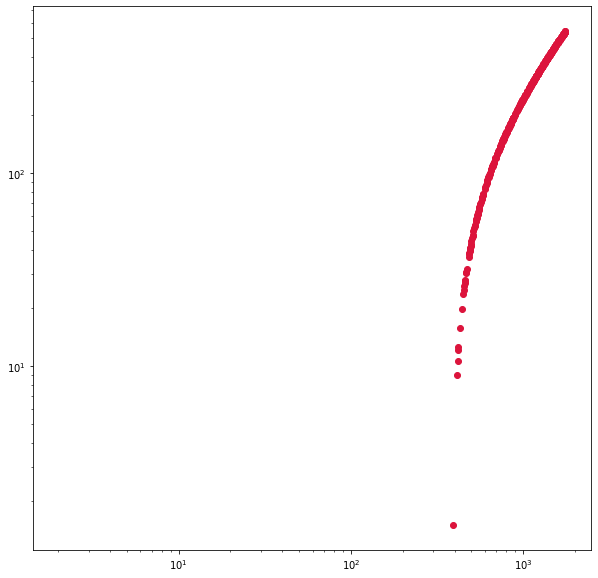

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(X_test, predictions, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictions.all()), max(X_test))
p2 = min(min(predictions.all()), min(X_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Evaluating the Algorithm
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors.

Mean Squared Error (MSE) is the mean of the squared errors.

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.

In [29]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 152.502269112843
Mean Squared Error: 35683.42279816926
Root Mean Squared Error: 188.90056325529912


In [30]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 606501.8073 MSE (778.7823 RMSE)
Test Score: 35683.42279817 MSE (188.90056326 RMSE)


# Checkpoint #3
Long-Sort Term Memory Model
In this section we will use LSTM to train and test on our data set.

Basic LSTM Model
First lets make a basic LSTM model.

Step 1 : import keras libraries for smooth implementaion of lstm

In [31]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('tesla_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

ModuleNotFoundError: No module named 'talib'

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [33]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [35]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 9s 92ms/step - loss: 113172.5156 - val_loss: 98651.1250
Epoch 2/100
20/20 [==============================] - 0s 25ms/step - loss: 112789.0312 - val_loss: 98001.2422
Epoch 3/100
20/20 [==============================] - 0s 21ms/step - loss: 111698.3828 - val_loss: 96739.8906
Epoch 4/100
20/20 [==============================] - 1s 34ms/step - loss: 110331.7109 - val_loss: 95659.7500
Epoch 5/100
20/20 [==============================] - 1s 26ms/step - loss: 109327.8438 - val_loss: 94993.2500
Epoch 6/100
20/20 [==============================] - 0s 14ms/step - loss: 108733.8438 - val_loss: 94563.6172
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 108294.3750 - val_loss: 94195.9609
Epoch 8/100
20/20 [==============================] - 0s 9ms/step - loss: 107898.7266 - val_loss: 93874.0469
Epoch 9/100
20/20 [==============================] - 0s 12ms/step - loss: 107535.3984 - val_loss: 93562.1250
Epoch 10/100
20/20 [

20/20 [==============================] - 0s 9ms/step - loss: 93445.6641 - val_loss: 81359.1094
Epoch 68/100
20/20 [==============================] - 0s 9ms/step - loss: 93255.7891 - val_loss: 81200.6484
Epoch 69/100
20/20 [==============================] - 0s 7ms/step - loss: 93070.7656 - val_loss: 81043.9453
Epoch 70/100
20/20 [==============================] - 0s 7ms/step - loss: 92882.3438 - val_loss: 80888.4141
Epoch 71/100
20/20 [==============================] - 0s 7ms/step - loss: 92699.0312 - val_loss: 80726.4609
Epoch 72/100
20/20 [==============================] - 0s 8ms/step - loss: 92509.8438 - val_loss: 80570.2812
Epoch 73/100
20/20 [==============================] - 0s 8ms/step - loss: 92332.7266 - val_loss: 80410.5469
Epoch 74/100
20/20 [==============================] - 0s 8ms/step - loss: 92145.3516 - val_loss: 80266.8281
Epoch 75/100
20/20 [==============================] - 0s 8ms/step - loss: 91970.8906 - val_loss: 80118.1250
Epoch 76/100
20/20 [=====================

In [37]:
import tensorflow as tf

tf.__version__

'2.9.0'

In [38]:
###Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

17/17 [==============================] - 0s 3ms/step


In [39]:
##Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

In [ ]:
### Plotting 
# shift train predictions for plotting
import numpy
look_back=100
trainPredictPlot = numpy.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Trying a different approach with LSTM


In [40]:
import pandas as pd

df=pd.read_csv('tesla.csv')

In [41]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,44.618000,45.136002,44.450001,44.481998,44.481998,11487500
1,44.574001,44.650002,42.652000,43.862000,43.862000,23822000
2,42.910000,43.299999,41.431999,42.018002,42.018002,26842500
3,42.012001,42.840000,40.841999,42.256001,42.256001,31309500
4,42.669998,42.956001,41.956001,42.189999,42.189999,14842000


In [42]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
1759,1073.670044,1117.000000,1070.719971,1093.939941,1093.939941,23715300
1760,1109.489990,1119.000000,1078.420044,1088.469971,1088.469971,20108000
1761,1098.640015,1104.000000,1064.140015,1086.189941,1086.189941,18718000
1762,1061.329956,1095.550049,1053.150024,1070.339966,1070.339966,15680300
1763,1073.439941,1082.000000,1054.589966,1056.780029,1056.780029,13577900


In [43]:
df1=df.reset_index()['Close']

In [44]:
df1

0         44.481998
1         43.862000
2         42.018002
3         42.256001
4         42.189999
           ...     
1759    1093.939941
1760    1088.469971
1761    1086.189941
1762    1070.339966
1763    1056.780029
Name: Close, Length: 1764, dtype: float64

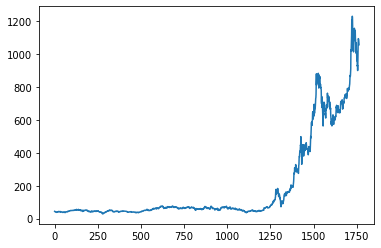

In [45]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [46]:
import numpy as np
df1

0         44.481998
1         43.862000
2         42.018002
3         42.256001
4         42.189999
           ...     
1759    1093.939941
1760    1088.469971
1761    1086.189941
1762    1070.339966
1763    1056.780029
Name: Close, Length: 1764, dtype: float64

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [48]:
print(df1)

[[0.01311048]
 [0.01259432]
 [0.01105916]
 ...
 [0.88035052]
 [0.86715513]
 [0.85586625]]


In [49]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [50]:
training_size,test_size

(1146, 618)

In [51]:
train_data

array([[0.01311048],
       [0.01259432],
       [0.01105916],
       ...,
       [0.01829374],
       [0.01906632],
       [0.01865006]])

In [52]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [53]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [54]:
print(X_train.shape), print(y_train.shape)

(1045, 100)
(1045,)


(None, None)

In [55]:
print(X_test.shape), print(ytest.shape)

(517, 100)
(517,)


(None, None)

In [56]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [57]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [58]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 10s 305ms/step - loss: 1.4070e-04 - val_loss: 0.1497
Epoch 2/100
17/17 [==============================] - 4s 233ms/step - loss: 5.2844e-05 - val_loss: 0.0663
Epoch 3/100
17/17 [==============================] - 4s 221ms/step - loss: 2.1489e-05 - val_loss: 0.0084
Epoch 4/100
17/17 [==============================] - 4s 217ms/step - loss: 1.3686e-05 - val_loss: 0.0169
Epoch 5/100
17/17 [==============================] - 4s 229ms/step - loss: 1.3575e-05 - val_loss: 0.0121
Epoch 6/100
17/17 [==============================] - 3s 200ms/step - loss: 1.2698e-05 - val_loss: 0.0097
Epoch 7/100
17/17 [==============================] - 3s 206ms/step - loss: 1.2339e-05 - val_loss: 0.0114
Epoch 8/100
17/17 [==============================] - 4s 227ms/step - loss: 1.1431e-05 - val_loss: 0.0080
Epoch 9/100
17/17 [==============================] - 4s 245ms/step - loss: 1.1481e-05 - val_loss: 0.0087
Epoch 10/100
17/17 [==============================] - 

17/17 [==============================] - 4s 228ms/step - loss: 3.9809e-06 - val_loss: 0.0024
Epoch 79/100
17/17 [==============================] - 4s 227ms/step - loss: 3.7993e-06 - val_loss: 0.0017
Epoch 80/100
17/17 [==============================] - 6s 365ms/step - loss: 3.6770e-06 - val_loss: 0.0017
Epoch 81/100
17/17 [==============================] - 5s 303ms/step - loss: 3.6778e-06 - val_loss: 0.0020
Epoch 82/100
17/17 [==============================] - 4s 269ms/step - loss: 4.3932e-06 - val_loss: 0.0028
Epoch 83/100
17/17 [==============================] - 4s 244ms/step - loss: 3.8975e-06 - val_loss: 0.0016
Epoch 84/100
17/17 [==============================] - 4s 220ms/step - loss: 3.5577e-06 - val_loss: 0.0026
Epoch 85/100
17/17 [==============================] - 4s 209ms/step - loss: 4.0078e-06 - val_loss: 0.0014
Epoch 86/100
17/17 [==============================] - 4s 219ms/step - loss: 4.1725e-06 - val_loss: 0.0017
Epoch 87/100
17/17 [==============================] - 4s 23

In [62]:
import tensorflow as tf
tf.__version__

'2.9.0'

In [63]:
###Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

17/17 [==============================] - 1s 40ms/step


In [64]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [65]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

56.3417876662996

In [66]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

565.1234990101754

c:\users\lavaa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



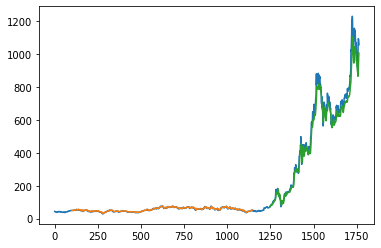

In [67]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [68]:
len(test_data)

618

In [69]:
x_input=test_data[518:].reshape(1,-1)
x_input.shape

(1, 100)

In [70]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [71]:
temp_input

[0.5653509463439819,
 0.5773641669346289,
 0.5731349641016312,
 0.5473269233993586,
 0.5302936490560712,
 0.5496746286833633,
 0.5367539417232805,
 0.5424067676747327,
 0.5640855035720223,
 0.5659087188025348,
 0.5681648593629982,
 0.5598063517250172,
 0.5687642475310851,
 0.5845737456247789,
 0.588578152488328,
 0.5872211958056592,
 0.5858059059916778,
 0.5867882704757084,
 0.6028974626534457,
 0.6036883643859204,
 0.604512548523456,
 0.5890360777316985,
 0.5946389038563115,
 0.5958793467148514,
 0.6053201168648773,
 0.6062858147399613,
 0.6083671083449833,
 0.5839576908477456,
 0.5916251947812662,
 0.6020816118203833,
 0.6034969016343648,
 0.6207716385560472,
 0.634899435156777,
 0.6234107046196221,
 0.6265326450271551,
 0.6216790541126508,
 0.6214625914476753,
 0.6267158252870697,
 0.6259332568590682,
 0.6277314721761611,
 0.6367725994012968,
 0.630012561837212,
 0.6353823095007352,
 0.6468543734289437,
 0.6513167055358632,
 0.6573441236859537,
 0.6779156479706107,
 0.70046018371496

In [72]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8132129]
101
1 day input [0.57736417 0.57313496 0.54732692 0.53029365 0.54967463 0.53675394
 0.54240677 0.5640855  0.56590872 0.56816486 0.55980635 0.56876425
 0.58457375 0.58857815 0.5872212  0.58580591 0.58678827 0.60289746
 0.60368836 0.60451255 0.58903608 0.5946389  0.59587935 0.60532012
 0.60628581 0.60836711 0.58395769 0.59162519 0.60208161 0.6034969
 0.62077164 0.63489944 0.6234107  0.62653265 0.62167905 0.62146259
 0.62671583 0.62593326 0.62773147 0.6367726  0.63001256 0.63538231
 0.64685437 0.65131671 0.65734412 0.67791565 0.70046018 0.69559831
 0.69687204 0.72034904 0.7334029  0.82929226 0.82393918 0.84011498
 0.87273306 0.90350287 0.98225067 0.95178889 0.98663805 1.
 0.99348966 0.94424623 0.82816005 0.86516541 0.86146908 0.83641866
 0.81974331 0.85415955 0.88269827 0.88883392 0.92270078 0.93919289
 0.89936529 0.90516791 0.87679575 0.92264244 0.92911112 0.88768504
 0.87902684 0.82105865 0.81609688 0.85167866 0.86600626 0.81175944
 0.82277368 0.7806316  0.77405475 0.7886071

9 day output [[0.62237656]]
10 day input [0.56816486 0.55980635 0.56876425 0.58457375 0.58857815 0.5872212
 0.58580591 0.58678827 0.60289746 0.60368836 0.60451255 0.58903608
 0.5946389  0.59587935 0.60532012 0.60628581 0.60836711 0.58395769
 0.59162519 0.60208161 0.6034969  0.62077164 0.63489944 0.6234107
 0.62653265 0.62167905 0.62146259 0.62671583 0.62593326 0.62773147
 0.6367726  0.63001256 0.63538231 0.64685437 0.65131671 0.65734412
 0.67791565 0.70046018 0.69559831 0.69687204 0.72034904 0.7334029
 0.82929226 0.82393918 0.84011498 0.87273306 0.90350287 0.98225067
 0.95178889 0.98663805 1.         0.99348966 0.94424623 0.82816005
 0.86516541 0.86146908 0.83641866 0.81974331 0.85415955 0.88269827
 0.88883392 0.92270078 0.93919289 0.89936529 0.90516791 0.87679575
 0.92264244 0.92911112 0.88768504 0.87902684 0.82105865 0.81609688
 0.85167866 0.86600626 0.81175944 0.82277368 0.7806316  0.77405475
 0.78860713 0.7477555  0.75245924 0.72529419 0.75742106 0.81598031
 0.86437456 0.88680253 0

18 day output [[0.5214602]]
19 day input [0.60368836 0.60451255 0.58903608 0.5946389  0.59587935 0.60532012
 0.60628581 0.60836711 0.58395769 0.59162519 0.60208161 0.6034969
 0.62077164 0.63489944 0.6234107  0.62653265 0.62167905 0.62146259
 0.62671583 0.62593326 0.62773147 0.6367726  0.63001256 0.63538231
 0.64685437 0.65131671 0.65734412 0.67791565 0.70046018 0.69559831
 0.69687204 0.72034904 0.7334029  0.82929226 0.82393918 0.84011498
 0.87273306 0.90350287 0.98225067 0.95178889 0.98663805 1.
 0.99348966 0.94424623 0.82816005 0.86516541 0.86146908 0.83641866
 0.81974331 0.85415955 0.88269827 0.88883392 0.92270078 0.93919289
 0.89936529 0.90516791 0.87679575 0.92264244 0.92911112 0.88768504
 0.87902684 0.82105865 0.81609688 0.85167866 0.86600626 0.81175944
 0.82277368 0.7806316  0.77405475 0.78860713 0.7477555  0.75245924
 0.72529419 0.75742106 0.81598031 0.86437456 0.88680253 0.88224868
 0.88035052 0.86715513 0.85586625 0.81321287 0.79694432 0.77448034
 0.74978906 0.72502905 0.70123

29 day output [[0.4311192]]
[[0.8132128715515137], [0.7969443202018738], [0.7744803428649902], [0.7497890591621399], [0.7250290513038635], [0.7012355327606201], [0.6789025068283081], [0.6582698822021484], [0.6394320130348206], [0.622376561164856], [0.6070064902305603], [0.5931601524353027], [0.5806348323822021], [0.5692079067230225], [0.5586563348770142], [0.5487721562385559], [0.5393727421760559], [0.5303073525428772], [0.5214601755142212], [0.5127495527267456], [0.504124641418457], [0.49556219577789307], [0.4870598316192627], [0.4786314070224762], [0.4703006446361542], [0.46209725737571716], [0.45405149459838867], [0.44619160890579224], [0.4385415315628052], [0.4311192035675049]]


In [73]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [74]:
import matplotlib.pyplot as plt
len(df1)

1764

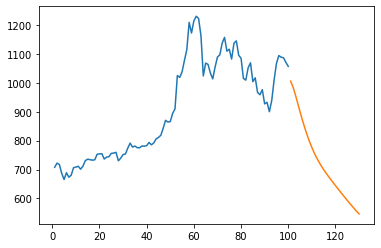

In [75]:
plt.plot(day_new,scaler.inverse_transform(df1[1664:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

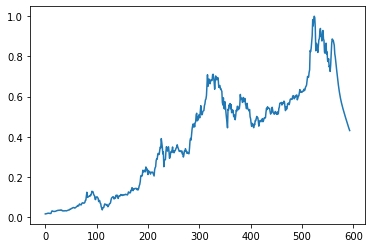

In [76]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [77]:
df3=scaler.inverse_transform(df3).tolist()

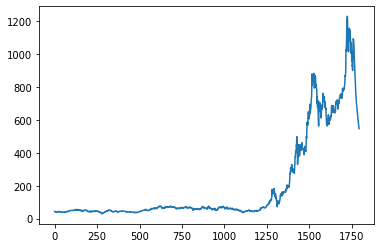

In [78]:
plt.plot(df3)

In [79]:
# IMPORTING IMPORTANT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM

# FUNCTION TO CREATE 1D DATA INTO TIME SERIES DATASET
def new_dataset(dataset, step_size):
	data_X, data_Y = [], []
	for i in range(len(dataset)-step_size-1):
		a = dataset[i:(i+step_size), 0]
		data_X.append(a)
		data_Y.append(dataset[i + step_size, 0])
	return np.array(data_X), np.array(data_Y)

# THIS FUNCTION CAN BE USED TO CREATE A TIME SERIES DATASET FROM ANY 1D ARRAY	

In [81]:
# FOR REPRODUCIBILITY
np.random.seed(7)

# IMPORTING DATASET 
dataset = pd.read_csv('tesla.csv', usecols=[1,2,3,4])
dataset = dataset.reindex(index = dataset.index[::-1])

# CREATING OWN INDEX FOR FLEXIBILITY
obs = np.arange(1, len(dataset) + 1, 1)

c:\users\lavaa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



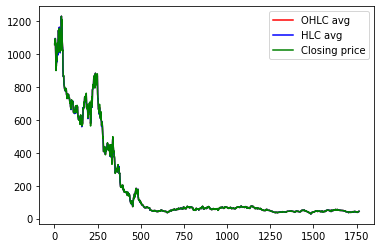

In [82]:
# TAKING DIFFERENT INDICATORS FOR PREDICTION
OHLC_avg = dataset.mean(axis = 1)
HLC_avg = dataset[['High', 'Low', 'Close']].mean(axis = 1)
close_val = dataset[['Close']]

# PLOTTING ALL INDICATORS IN ONE PLOT
plt.plot(obs, OHLC_avg, 'r', label = 'OHLC avg')
plt.plot(obs, HLC_avg, 'b', label = 'HLC avg')
plt.plot(obs, close_val, 'g', label = 'Closing price')
plt.legend(loc = 'upper right')
plt.show()

In [83]:
# PREPARATION OF TIME SERIES DATASE
OHLC_avg = np.reshape(OHLC_avg.values, (len(OHLC_avg),1)) # 1664
scaler = MinMaxScaler(feature_range=(0, 1))
OHLC_avg = scaler.fit_transform(OHLC_avg)

# TRAIN-TEST SPLIT
train_OHLC = int(len(OHLC_avg) * 0.75)
test_OHLC = len(OHLC_avg) - train_OHLC
train_OHLC, test_OHLC = OHLC_avg[0:train_OHLC,:], OHLC_avg[train_OHLC:len(OHLC_avg),:]

# TIME-SERIES DATASET (FOR TIME T, VALUES FOR TIME T+1)
trainX, trainY = new_dataset(train_OHLC, 1)
testX, testY = new_dataset(test_OHLC, 1)

# RESHAPING TRAIN AND TEST DATA
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
step_size = 1

Epoch 1/5
1321/1321 - 5s - loss: 0.0105 - 5s/epoch - 4ms/step
Epoch 2/5
1321/1321 - 3s - loss: 2.6924e-04 - 3s/epoch - 3ms/step
Epoch 3/5
1321/1321 - 4s - loss: 1.7459e-04 - 4s/epoch - 3ms/step
Epoch 4/5
1321/1321 - 5s - loss: 1.6090e-04 - 5s/epoch - 4ms/step
Epoch 5/5
1321/1321 - 3s - loss: 1.8359e-04 - 3s/epoch - 2ms/step
14/14 [==============================] - 0s 2ms/step
Train RMSE: 12.50
Test RMSE: 1.41
1/1 [==============================] - 0s 16ms/step
Last Day Value: 43.32948303222656
Next Day Value: 42.29911804199219


c:\users\lavaa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:51: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.

c:\users\lavaa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:57: DeprecationWarning:

np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead

c:\users\lavaa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:58: DeprecationWarning:

np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead



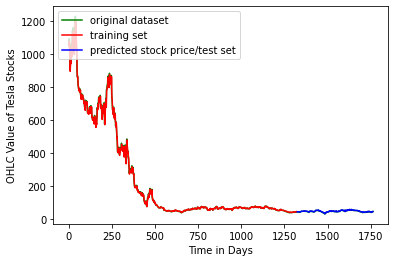

In [84]:
# LSTM MODEL
model = Sequential()
model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
model.add(LSTM(16))
model.add(Dense(1))
model.add(Activation('linear'))

# MODEL COMPILING AND TRAINING
model.compile(loss='mean_squared_error', optimizer='adam') # Try SGD, adam, adagrad and compare!!!
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)

# PREDICTION
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# DE-NORMALIZING FOR PLOTTING
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


# TRAINING RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f' % (trainScore))

# TEST RMSE
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f' % (testScore))

# CREATING SIMILAR DATASET TO PLOT TRAINING PREDICTIONS
trainPredictPlot = np.empty_like(OHLC_avg)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict

# CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS
testPredictPlot = np.empty_like(OHLC_avg)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(step_size*2)+1:len(OHLC_avg)-1, :] = testPredict

# DE-NORMALIZING MAIN DATASET 
OHLC_avg = scaler.inverse_transform(OHLC_avg)

# PLOT OF MAIN OHLC VALUES, TRAIN PREDICTIONS AND TEST PREDICTIONS
plt.plot(OHLC_avg, 'g', label = 'original dataset')
plt.plot(trainPredictPlot, 'r', label = 'training set')
plt.plot(testPredictPlot, 'b', label = 'predicted stock price/test set')
plt.legend(loc = 'upper left')
plt.xlabel('Time in Days')
plt.ylabel('OHLC Value of Tesla Stocks')
plt.show()

# PREDICT FUTURE VALUES
last_val = testPredict[-1]
last_val_scaled = last_val/last_val
next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
print ("Last Day Value:", np.asscalar(last_val))
print ("Next Day Value:", np.asscalar(last_val*next_val))
# print np.append(last_val, next_val)

# Trying out RNN based LSTM

In [93]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('tesla.csv')
# '.values' need the 2nd Column Opening Price as a Numpy array (not vector)
# '1:2' is used because the upper bound is ignored
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
# Use Normalization (versus Standardization) for RNNs with Sigmoid Activation Functions
# 'MinMaxScalar' is a Normalization Library
from sklearn.preprocessing import MinMaxScaler
# 'feature_range = (0,1)' makes sure that training data is scaled to have values between 0 and 1
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps (look back 60 days) and 1 output
# This tells the RNN what to remember (Number of timesteps) when predicting the next Stock Price
# The wrong number of timesteps can lead to Overfitting or bogus results
# 'x_train' Input with 60 previous days' stock prices
X_train = []
# 'y_train' Output with next day's stock price
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping (add more dimensions)
# This lets you add more indicators that may potentially have corelation with Stock Prices
# Keras RNNs expects an input shape (Batch Size, Timesteps, input_dim)
# '.shape[0]' is the number of Rows (Batch Size)
# '.shape[1]' is the number of Columns (timesteps)
# 'input_dim' is the number of factors that may affect stock prices
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Show the dataset we're working with
display(dataset_train)
#dataset_train.to_csv('tesla_train.csv',index = False)

,Open,High,Low,Close,Adj Close,Volume
0,44.618000,45.136002,44.450001,44.481998,44.481998,11487500
1,44.574001,44.650002,42.652000,43.862000,43.862000,23822000
2,42.910000,43.299999,41.431999,42.018002,42.018002,26842500
3,42.012001,42.840000,40.841999,42.256001,42.256001,31309500
4,42.669998,42.956001,41.956001,42.189999,42.189999,14842000
...,...,...,...,...,...,...
1759,1073.670044,1117.000000,1070.719971,1093.939941,1093.939941,23715300
1760,1109.489990,1119.000000,1078.420044,1088.469971,1088.469971,20108000
1761,1098.640015,1104.000000,1064.140015,1086.189941,1086.189941,18718000
1762,1061.329956,1095.550049,1053.150024,1070.339966,1070.339966,15680300


In [94]:
# Part 2 - Building the RNN
# Building a robust stacked LSTM with dropout regularization

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN.
# Regression is when you predict a continuous value
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
# 'units' is the number of LSTM Memory Cells (Neurons) for higher dimensionality
# 'return_sequences = True' because we will add more stacked LSTM Layers
# 'input_shape' of x_train
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# 20% of Neurons will be ignored (10 out of 50 Neurons) to prevent Overfitting
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
# Not need to specify input_shape for second Layer, it knows that we have 50 Neurons from the previous layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
# This is the last LSTM Layer. 'return_sequences = false' by default so we leave it out.
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
# 'units = 1' because Output layer has one dimension
regressor.add(Dense(units = 1))

# Compiling the RNN
# Keras documentation recommends 'RMSprop' as a good optimizer for RNNs
# Trial and error suggests that 'adam' optimizer is a good choice
# loss = 'mean_squared_error' which is good for Regression vs. 'Binary Cross Entropy' previously used for Classification
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
# 'X_train' Independent variables
# 'y_train' Output Truths that we compare X_train to.
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



Epoch 1/100
38/38 [==============================] - 16s 97ms/step - loss: 1.2817e-04
Epoch 2/100
38/38 [==============================] - 4s 100ms/step - loss: 4.0940e-05
Epoch 3/100
38/38 [==============================] - 4s 105ms/step - loss: 2.4339e-05
Epoch 4/100
38/38 [==============================] - 4s 97ms/step - loss: 2.0147e-05
Epoch 5/100
38/38 [==============================] - 4s 99ms/step - loss: 2.0944e-05
Epoch 6/100
38/38 [==============================] - 4s 94ms/step - loss: 1.8088e-05
Epoch 7/100
38/38 [==============================] - 4s 102ms/step - loss: 1.8871e-05
Epoch 8/100
38/38 [==============================] - 4s 107ms/step - loss: 1.6983e-05
Epoch 9/100
38/38 [==============================] - 4s 111ms/step - loss: 1.6925e-05
Epoch 10/100
38/38 [==============================] - 7s 193ms/step - loss: 1.6075e-05
Epoch 11/100
38/38 [==============================] - 6s 150ms/step - loss: 1.5291e-05
Epoch 12/100
38/38 [==============================] - 4

38/38 [==============================] - 4s 103ms/step - loss: 4.6957e-06
Epoch 96/100
38/38 [==============================] - 4s 100ms/step - loss: 4.9374e-06
Epoch 97/100
38/38 [==============================] - 4s 97ms/step - loss: 5.0694e-06
Epoch 98/100
38/38 [==============================] - 4s 92ms/step - loss: 4.6165e-06
Epoch 99/100
38/38 [==============================] - 4s 94ms/step - loss: 4.8058e-06
Epoch 100/100
38/38 [==============================] - 4s 94ms/step - loss: 5.2970e-06


1/1 [==============================] - 0s 55ms/step


c:\users\lavaa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:39: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



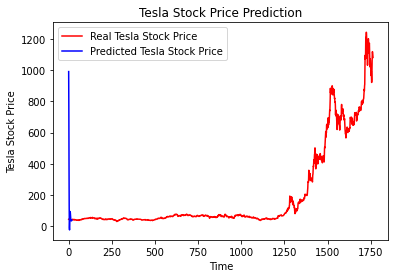

In [96]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('tesla_train.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
# We need 60 previous inputs for each day of the Test_set in 2017
# Combine 'dataset_train' and 'dataset_test'
# 'axis = 0' for Vertical Concatenation to add rows to the bottom
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
# Extract Stock Prices for Test time period, plus 60 days previous
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
# 'reshape' function to get it into a NumPy format
inputs = inputs.reshape(-1,1)
# Inputs need to be scaled to match the model trained on Scaled Feature
inputs = sc.transform(inputs)
# The following is pasted from above and modified for Testing, romove all 'Ys'
X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
# We need a 3D input so add another dimension
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Predict the Stock Price
predicted_stock_price = regressor.predict(X_test)
# We need to inverse the scaling of our prediction to get a Dollar amount
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Tesla Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()
